In [8]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Combined_Csvs\combined_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data

,Date,4YO,5YO,3-5YO Avg.,Source_File,3YO,6YO,2YO
0,2015-01-01,80000,70000.0,93000.0,02_2018.csv,NaN,NaN,NaN
1,2015-01-01,79000,69000.0,80000.0,06_2018.csv,NaN,NaN,NaN
2,2015-01-01,78000,69000.0,93000.0,05_2018_2.csv,NaN,NaN,NaN
3,2015-01-01,80000,69000.0,78000.0,08_2018.csv,NaN,NaN,NaN
4,2015-01-01,78000,69000.0,80000.0,04_2018.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2412,2024-11-01,62000,49000.0,NaN,01_2025_2.csv,NaN,36000.0,NaN
2413,2024-12-01,60000,39000.0,NaN,03_2025.csv,NaN,35000.0,NaN
2414,2024-12-01,60000,47000.0,NaN,01_2025_2.csv,NaN,35000.0,NaN
2415,2025-01-01,108000,56000.0,NaN,03_2025.csv,NaN,52000.0,NaN


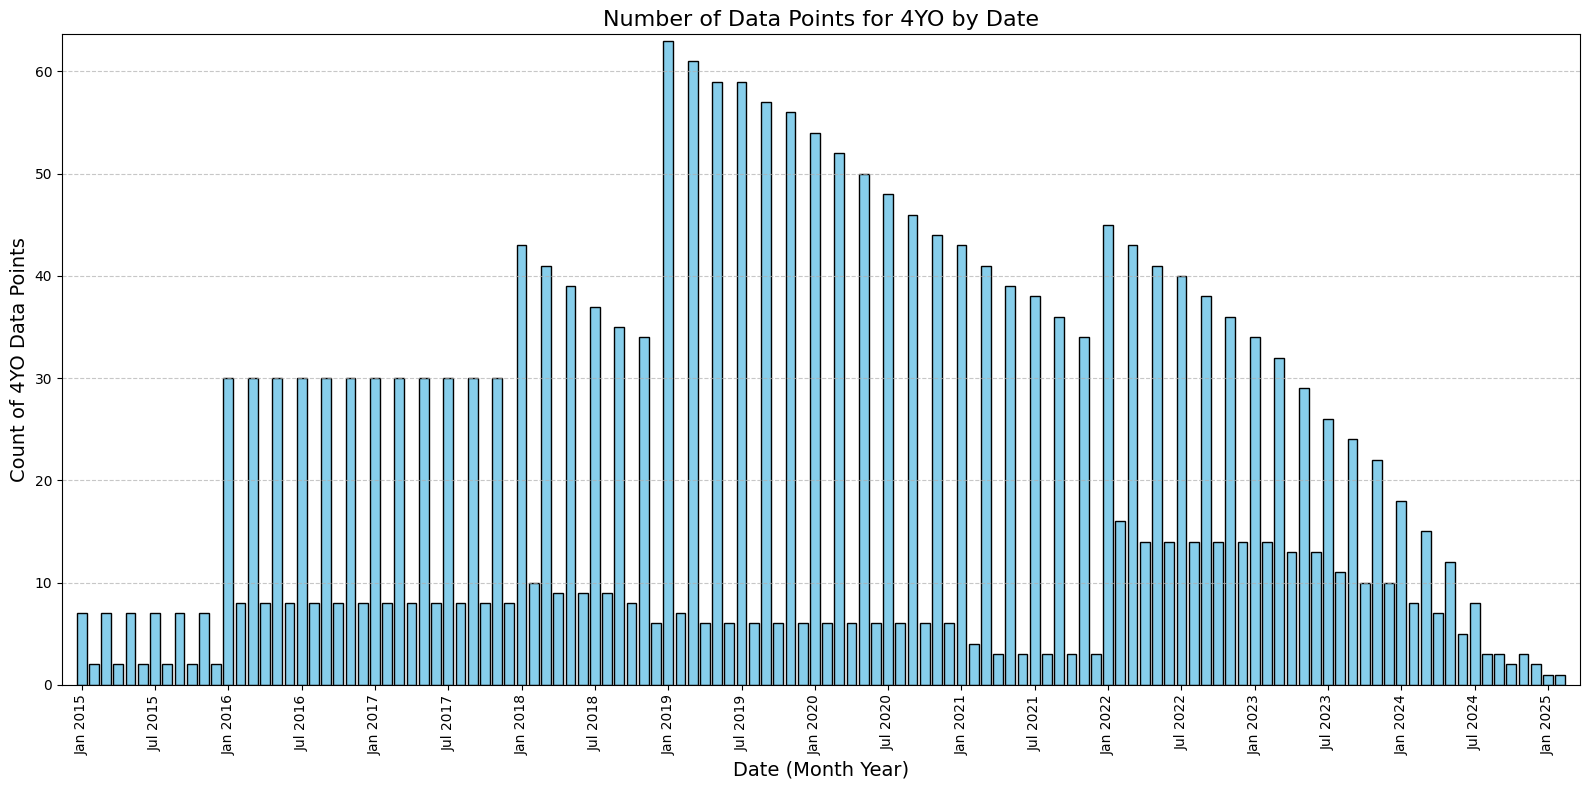

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Group by Date and count non-null values in the 4YO column
date_counts = data.groupby('Date')['4YO'].count().reset_index()

# Format the dates to show only month and year
date_counts['formatted_date'] = date_counts['Date'].dt.strftime('%b %Y')

# Plot the histogram with improved x-axis
plt.figure(figsize=(16, 8))

# Create bar chart with formatted dates
bars = plt.bar(range(len(date_counts)), date_counts['4YO'], color='skyblue', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_positions = range(0, len(date_counts), 6)
plt.xticks(tick_positions, [date_counts['formatted_date'][i] for i in tick_positions], rotation=90)

# Add labels and title
plt.title('Number of Data Points for 4YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 4YO Data Points', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set margins to give the plot more space
plt.margins(0.01)
plt.tight_layout()
plt.show()

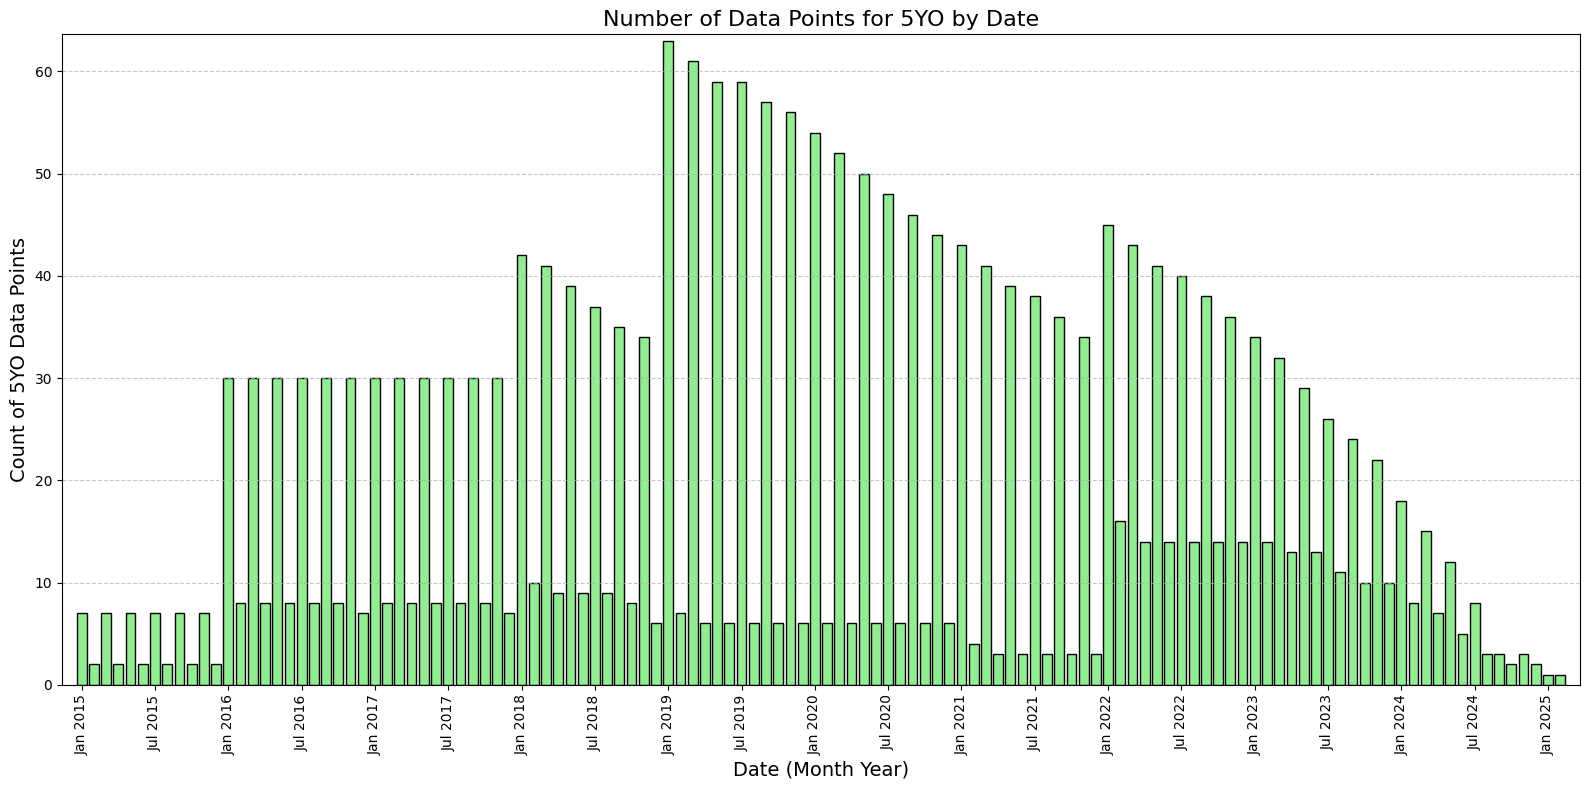

In [10]:
# Similar visualization for 5YO data
import matplotlib.pyplot as plt
import numpy as np

# Group by Date and count non-null values in the 5YO column
date_counts_5yo = data.groupby('Date')['5YO'].count().reset_index()

# Format the dates to show only month and year
date_counts_5yo['formatted_date'] = date_counts_5yo['Date'].dt.strftime('%b %Y')

# Plot the histogram with improved x-axis
plt.figure(figsize=(16, 8))

# Create bar chart with formatted dates
bars_5yo = plt.bar(range(len(date_counts_5yo)), date_counts_5yo['5YO'], color='lightgreen', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_positions = range(0, len(date_counts_5yo), 6)
plt.xticks(tick_positions, [date_counts_5yo['formatted_date'][i] for i in tick_positions], rotation=90)

# Add labels and title
plt.title('Number of Data Points for 5YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 5YO Data Points', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set margins to give the plot more space
plt.margins(0.01)
plt.tight_layout()
plt.show()

In [ ]:
# Create visualizations for 3YO, 6YO, and 2YO data
import matplotlib.pyplot as plt
import numpy as np

# Function to generate count data for a specific column
def get_date_counts(column_name):
    counts = data.groupby('Date')[column_name].count().reset_index()
    counts['formatted_date'] = counts['Date'].dt.strftime('%b %Y')
    return counts

# Get counts for each age group
date_counts_3yo = get_date_counts('3YO')
date_counts_6yo = get_date_counts('6YO')
date_counts_2yo = get_date_counts('2YO')

# Create a 2x2 grid of subplots for all age groups
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# Configure color scheme for consistency
colors = {
    '2YO': 'lightcoral',
    '3YO': 'gold',
    '4YO': 'skyblue',
    '5YO': 'lightgreen',
    '6YO': 'orchid'
}

# Helper function to create a bar plot in a given axis
def plot_age_group(ax, date_counts, column_name):
    ax.bar(range(len(date_counts)), date_counts[column_name], color=colors[column_name], edgecolor='black')
    ax.set_title(f'Data Points for {column_name} by Date', fontsize=14)
    ax.set_ylabel('Count', fontsize=12)
    tick_positions = range(0, len(date_counts), 6)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([date_counts['formatted_date'][i] for i in tick_positions], rotation=90)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Plot each age group
plot_age_group(axs[0, 0], date_counts, '4YO')  # 4YO in top-left
plot_age_group(axs[0, 1], date_counts_5yo, '5YO')  # 5YO in top-right
plot_age_group(axs[1, 0], date_counts_3yo, '3YO')  # 3YO in bottom-left
plot_age_group(axs[1, 1], date_counts_6yo, '6YO')  # 6YO in bottom-right

plt.tight_layout()
plt.show()

# Create a separate plot for 2YO since it has very few data points
plt.figure(figsize=(16, 8))
plt.bar(range(len(date_counts_2yo)), date_counts_2yo['2YO'], color=colors['2YO'], edgecolor='black')
plt.title('Number of Data Points for 2YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 2YO Data Points', fontsize=14)
tick_positions = range(0, len(date_counts_2yo), max(1, len(date_counts_2yo) // 10))
plt.xticks(tick_positions, [date_counts_2yo['formatted_date'][i] for i in tick_positions], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

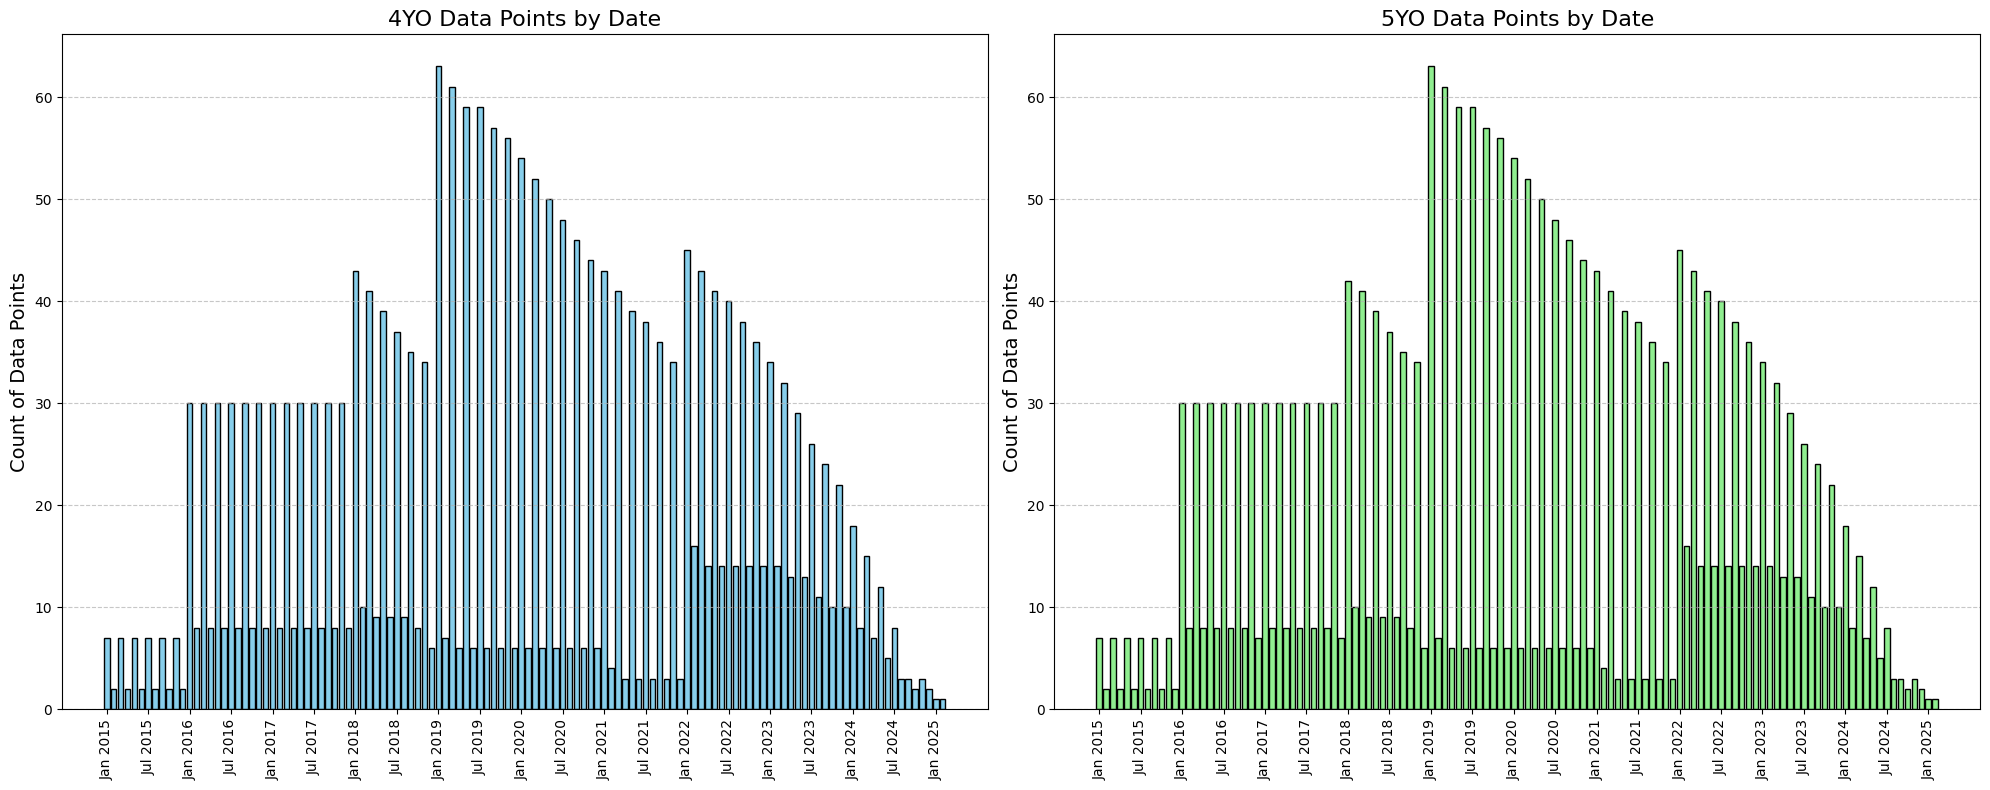

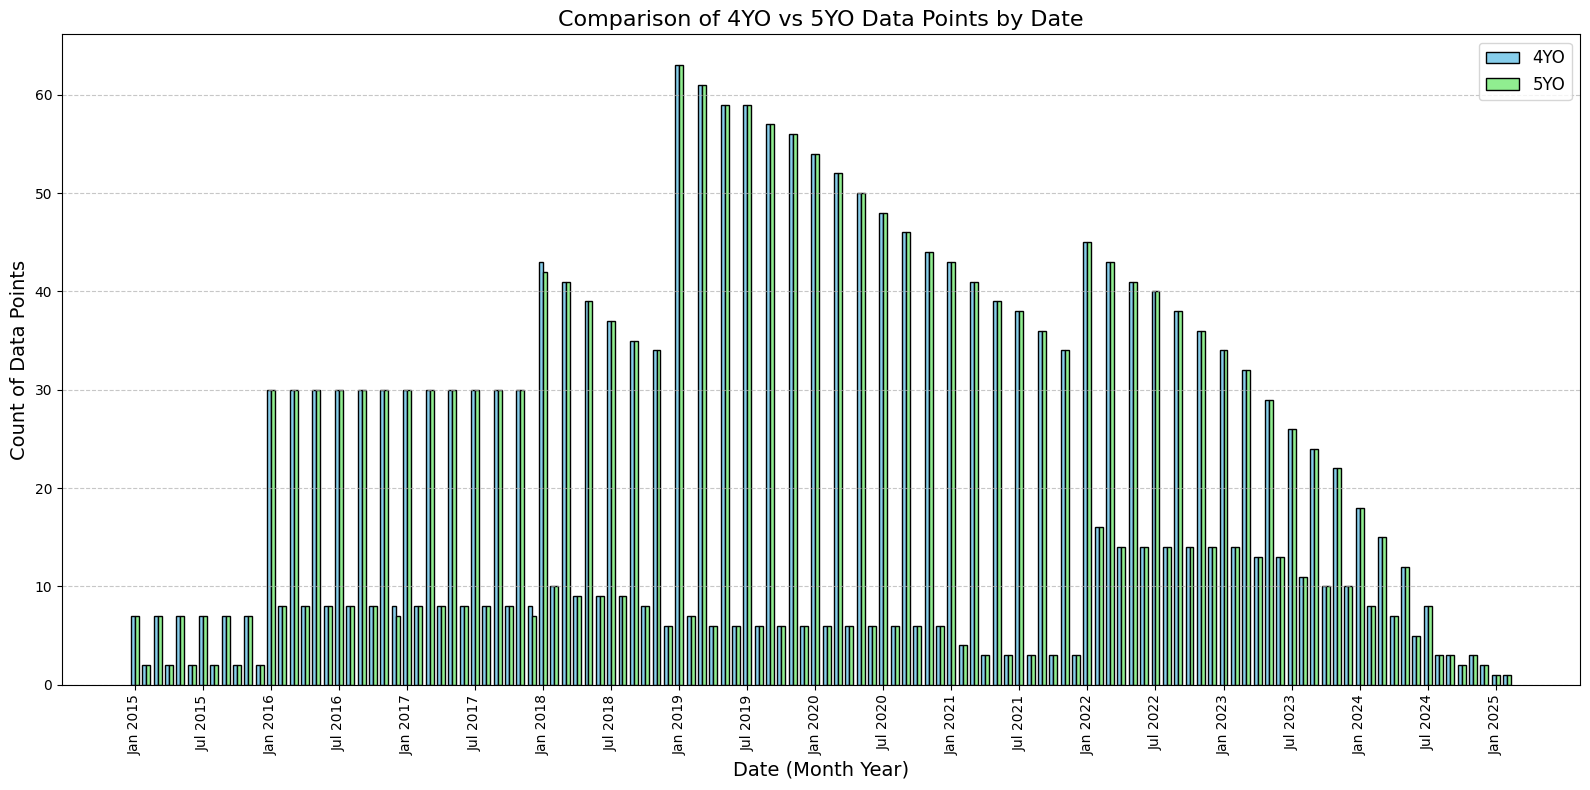

In [11]:
# Comparison visualization for 4YO vs 5YO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot for 4YO
ax1.bar(range(len(date_counts)), date_counts['4YO'], color='skyblue', edgecolor='black')
ax1.set_title('4YO Data Points by Date', fontsize=16)
ax1.set_ylabel('Count of Data Points', fontsize=14)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels([date_counts['formatted_date'][i] for i in tick_positions], rotation=90)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for 5YO
ax2.bar(range(len(date_counts_5yo)), date_counts_5yo['5YO'], color='lightgreen', edgecolor='black')
ax2.set_title('5YO Data Points by Date', fontsize=16)
ax2.set_ylabel('Count of Data Points', fontsize=14)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels([date_counts_5yo['formatted_date'][i] for i in tick_positions], rotation=90)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Create a single plot with both 4YO and 5YO for direct comparison
plt.figure(figsize=(16, 8))

# Get common dates for proper comparison
common_dates = sorted(set(date_counts['Date']).intersection(set(date_counts_5yo['Date'])))
date_indices = [date_counts['Date'].tolist().index(date) for date in common_dates]
date_indices_5yo = [date_counts_5yo['Date'].tolist().index(date) for date in common_dates]

# Calculate x positions for grouped bars
x = np.arange(len(common_dates))
width = 0.35

# Create grouped bar chart
plt.bar(x - width/2, [date_counts['4YO'][i] for i in date_indices], width, label='4YO', color='skyblue', edgecolor='black')
plt.bar(x + width/2, [date_counts_5yo['5YO'][i] for i in date_indices_5yo], width, label='5YO', color='lightgreen', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_indices = range(0, len(common_dates), 6)
plt.xticks(tick_indices, [pd.to_datetime(common_dates[i]).strftime('%b %Y') for i in tick_indices], rotation=90)

# Add labels, title and legend
plt.title('Comparison of 4YO vs 5YO Data Points by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of Data Points', fontsize=14)
plt.legend(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Comprehensive comparison of all age groups
import matplotlib.pyplot as plt
import numpy as np

# Function to get values at common dates
def get_values_at_dates(df, column, dates):
    values = []
    for date in dates:
        if date in df['Date'].values:
            idx = df['Date'].tolist().index(date)
            values.append(df[column][idx])
        else:
            values.append(0)  # Use 0 if date not present
    return values

# Find dates with data for any of the age groups
all_dates = sorted(set(
    list(date_counts['Date']) + 
    list(date_counts_5yo['Date']) + 
    list(date_counts_3yo['Date']) + 
    list(date_counts_6yo['Date']) + 
    list(date_counts_2yo['Date'])
))

# Create a line chart comparing all age groups
plt.figure(figsize=(18, 10))

# Plot line for each age group
plt.plot(all_dates, get_values_at_dates(date_counts, '4YO', all_dates), marker='o', linestyle='-', color=colors['4YO'], label='4YO')
plt.plot(all_dates, get_values_at_dates(date_counts_5yo, '5YO', all_dates), marker='s', linestyle='-', color=colors['5YO'], label='5YO')
plt.plot(all_dates, get_values_at_dates(date_counts_3yo, '3YO', all_dates), marker='^', linestyle='-', color=colors['3YO'], label='3YO')
plt.plot(all_dates, get_values_at_dates(date_counts_6yo, '6YO', all_dates), marker='d', linestyle='-', color=colors['6YO'], label='6YO')
plt.plot(all_dates, get_values_at_dates(date_counts_2yo, '2YO', all_dates), marker='*', linestyle='-', color=colors['2YO'], label='2YO')

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)

# Add labels and title
plt.title('Comparison of Data Points Across Age Groups', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Data Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a stacked bar chart to show distribution over time
plt.figure(figsize=(18, 10))

# Select some dates for better visualization (every 6 months)
selected_dates = all_dates[::6]
x = np.arange(len(selected_dates))

# Get values for each age group at selected dates
values_4yo = get_values_at_dates(date_counts, '4YO', selected_dates)
values_5yo = get_values_at_dates(date_counts_5yo, '5YO', selected_dates)
values_3yo = get_values_at_dates(date_counts_3yo, '3YO', selected_dates)
values_6yo = get_values_at_dates(date_counts_6yo, '6YO', selected_dates)
values_2yo = get_values_at_dates(date_counts_2yo, '2YO', selected_dates)

# Create stacked bar chart
plt.bar(x, values_4yo, color=colors['4YO'], label='4YO')
plt.bar(x, values_5yo, bottom=values_4yo, color=colors['5YO'], label='5YO')
plt.bar(x, values_3yo, bottom=[sum(x) for x in zip(values_4yo, values_5yo)], color=colors['3YO'], label='3YO')
plt.bar(x, values_6yo, bottom=[sum(x) for x in zip(values_4yo, values_5yo, values_3yo)], color=colors['6YO'], label='6YO')
plt.bar(x, values_2yo, bottom=[sum(x) for x in zip(values_4yo, values_5yo, values_3yo, values_6yo)], color=colors['2YO'], label='2YO')

# Format x-axis
plt.xticks(x, [pd.to_datetime(date).strftime('%b %Y') for date in selected_dates], rotation=90)

# Add labels and title
plt.title('Distribution of Data Points Across Age Groups Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Data Points', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Display non-null counts for each age group for reference
print("Number of non-null values for each age group:")
for col in ['2YO', '3YO', '4YO', '5YO', '6YO']:
    print(f"{col}: {data[col].count()} non-null values")